In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List
from datetime import datetime
from tqdm import tqdm

In [35]:
gpt4omini_scores={'vanilla': [4.208333492279053, 3.5833332538604736, 4.083333492279053, 3.375, 3.5833332538604736, 0.21527791023254395], 'liberal': [3.7916667461395264, 3.625, 3.9583332538604736, 2.3333332538604736, 2.625, 0.7361114025115967], 'conservative': [4.208333492279053, 3.4583332538604736, 3.0, 3.7916667461395264, 4.041666507720947, 0.22222208976745605], 'female-liberal': [3.875, 3.7083332538604736, 4.333333492279053, 2.7916667461395264, 2.375, 0.6249997615814209], 'male-liberal': [3.75, 3.7916667461395264, 4.208333492279053, 2.7083332538604736, 2.125, 0.7569444179534912]} 
gpt4o_scores={'vanilla': [4.333333492279053, 3.8333332538604736, 3.75, 3.0416667461395264, 3.3333332538604736, 0.7083334922790527], 'liberal': [3.25, 4.291666507720947, 3.5, 2.0833332538604736, 2.1666667461395264, 1.1875], 'conservative': [4.375, 3.625, 3.125, 4.0, 4.041666507720947, 0.27777791023254395]} 
mixtral7x8b_scores={'vanilla': [2.125, 2.9583332538604736, 2.2916667461395264, 2.0, 2.1666667461395264, 0.3888885974884033], 'liberal': [1.7083333730697632, 2.9583332538604736, 2.125, 1.2083333730697632, 1.2916666269302368, 0.7916666269302368], 'conservative': [2.125, 3.4166667461395264, 2.125, 2.7083332538604736, 3.0833332538604736, 0.13194489479064941]} 
claude3haiku_scores={'vanilla': [3.5833332538604736, 3.9583332538604736, 3.75, 2.7083332538604736, 2.5, 0.7847223281860352], 'liberal': [3.5833332538604736, 4.333333492279053, 3.25, 2.3333332538604736, 3.0, 1.0972225666046143], 'conservative': [3.2083332538604736, 4.166666507720947, 3.0833332538604736, 3.2083332538604736, 2.875, 0.6319446563720703]} 
llama318b_scores={} 
llama3170b_scores={'vanilla': [3.375, 4.041666507720947, 4.333333492279053, 3.0833332538604736, 3.625, 0.027777671813964844], 'liberal': [3.25, 4.083333492279053, 3.6666667461395264, 2.0416667461395264, 2.4166667461395264, 0.9583334922790527], 'conservative': [3.7916667461395264, 4.541666507720947, 3.7916667461395264, 4.25, 4.583333492279053, -0.04166698455810547]} 
llama31405b_scores={}

In [21]:
def plot_radar_chart(title, scores_list, labels):
    # Define the attributes
    # attributes = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity', 'Progressivism']
    attributes = ['Care', 'Fairness', 'Loyalty', 'Authority', 'Sanctity']
    
    # Number of attributes
    num_attrs = len(attributes)
    
    # Calculate the angle for each attribute
    angles = [n / float(num_attrs) * 2 * np.pi for n in range(num_attrs)]
    angles += angles[:1]  # Complete the circle
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Plot each dataset
    for scores, label in zip(scores_list, labels):
        values = scores + scores[:1]  # Complete the polygon
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.1)
    
    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    
    # Set y-axis limits
    ax.set_ylim(0, 5)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.title(title)
    plt.tight_layout()
    plt.show()


# model comparison

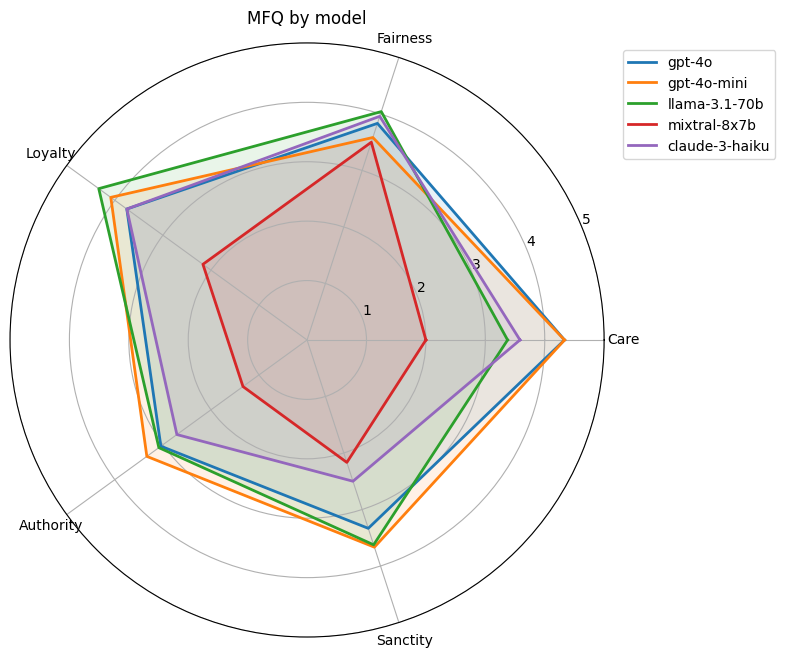

In [23]:
plot_radar_chart("MFQ by model", [gpt4o_scores['vanilla'][:5], gpt4omini_scores['vanilla'][:5], llama3170b_scores['vanilla'][:5], mixtral8x7b_scores['vanilla'][:5], claude3haiku_scores['vanilla'][:5]], ["gpt-4o", "gpt-4o-mini", "llama-3.1-70b", "mixtral-8x7b", "claude-3-haiku"])

In [24]:
plot_radar_chart("MFQ by model in llama-3.1 family", [llama318b_scores['vanilla'][:5], llama3170b_scores['vanilla'][:5], llama31405b_scores['vanilla'][:5]], ["llama-3.1-8b", "llama-3.1-70b", "llama-3.1-405b"])

KeyError: 'vanilla'

## political bias
- llama-3.1 family has the strongest political biases (e.g. political prompts change its answers the most)
    - bias seems present regardless of size
- need to compare to empirical human data to see how it compares to humans

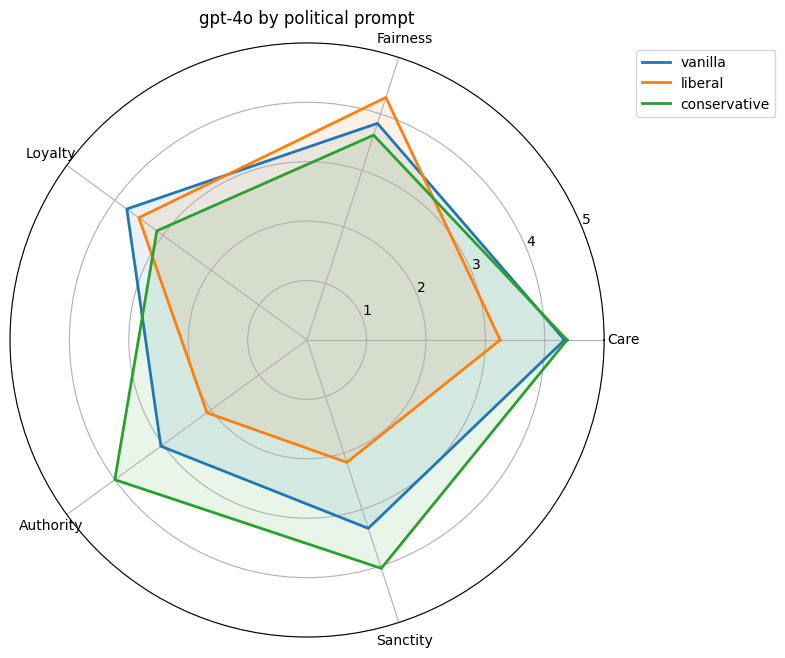

In [25]:
plot_radar_chart("gpt-4o by political prompt", [gpt4o_scores['vanilla'][:5], gpt4o_scores['liberal'][:5], gpt4o_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

In [26]:
plot_radar_chart("gpt-4o-mini by political prompt (left)", [gpt4omini_scores['vanilla'][:5], gpt4omini_scores['liberal'][:5], gpt4omini_scores['democrat'][:5]], ["vanilla", "liberal", "democrat"])

KeyError: 'democrat'

In [27]:
plot_radar_chart("gpt-4o-mini by political prompt (right)", [gpt4omini_scores['vanilla'][:5], gpt4omini_scores['conservative'][:5], gpt4omini_scores['republican'][:5]], ["vanilla", "conservative", "republican"])

KeyError: 'republican'

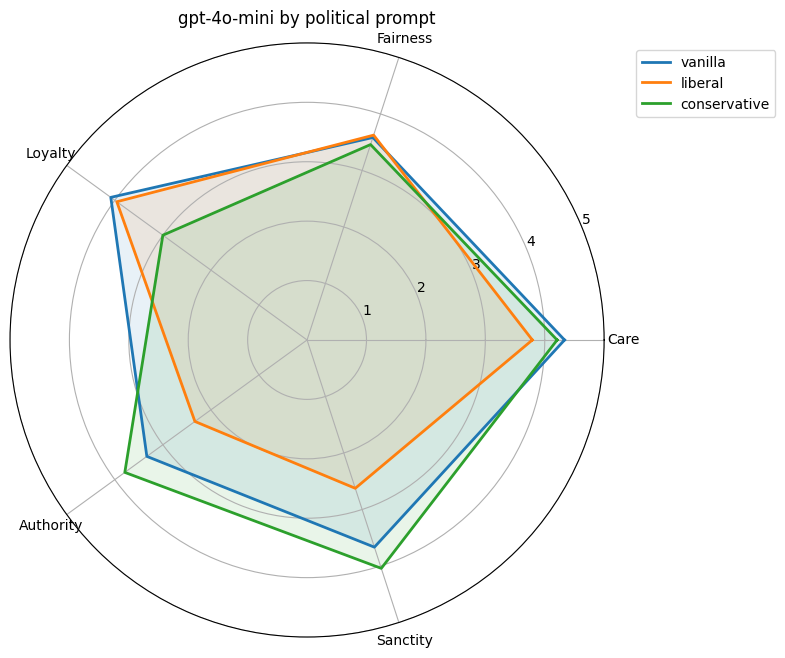

In [28]:
plot_radar_chart("gpt-4o-mini by political prompt", [gpt4omini_scores['vanilla'][:5], gpt4omini_scores['liberal'][:5], gpt4omini_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

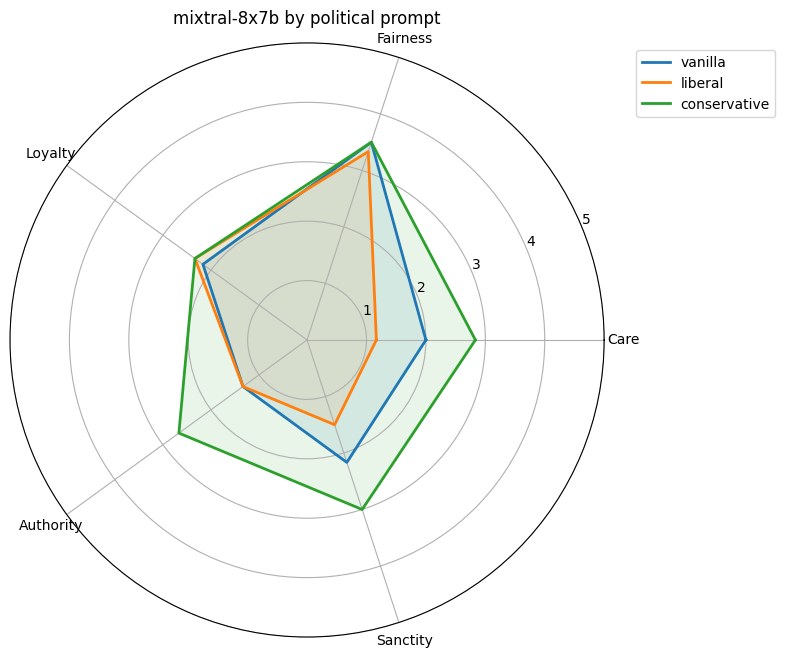

In [29]:
plot_radar_chart("mixtral-8x7b by political prompt", [mixtral8x7b_scores['vanilla'][:5], mixtral8x7b_scores['liberal'][:5], mixtral8x7b_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

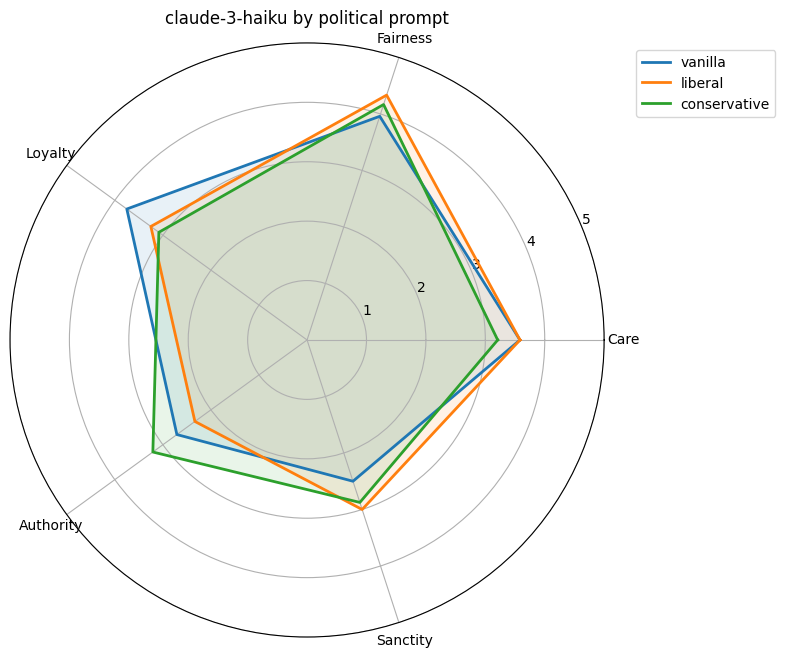

In [30]:
plot_radar_chart("claude-3-haiku by political prompt", [claude3haiku_scores['vanilla'][:5], claude3haiku_scores['liberal'][:5], claude3haiku_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

### llama-3.1 family appears to have largest biases, and they remain even with scaling

In [31]:
plot_radar_chart("llama-3.1-8b by political prompt", [llama318b_scores['vanilla'][:5], llama318b_scores['liberal'][:5], llama318b_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

KeyError: 'vanilla'

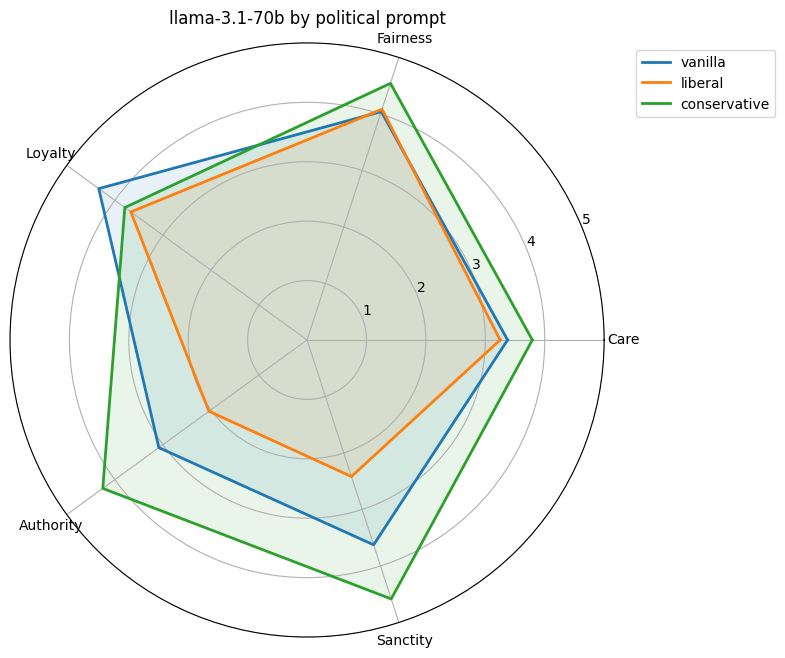

In [33]:
plot_radar_chart("llama-3.1-70b by political prompt", [llama3170b_scores['vanilla'][:5], llama3170b_scores['liberal'][:5], llama3170b_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

In [34]:
plot_radar_chart("llama-3.1-405b by political prompt", [llama31405b_scores['vanilla'][:5], llama31405b_scores['liberal'][:5], llama31405b_scores['conservative'][:5]], ["vanilla", "liberal", "conservative"])

KeyError: 'vanilla'

### gender-political bias

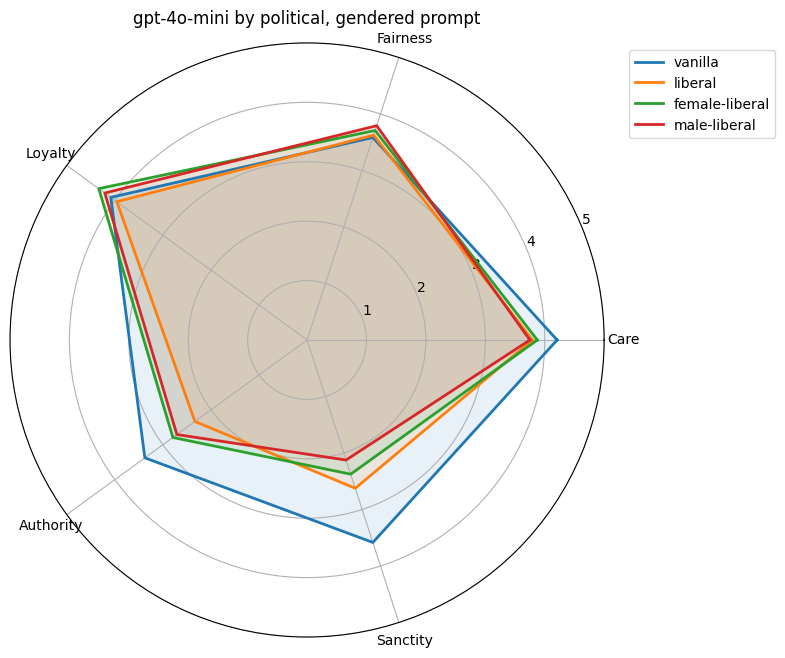

In [37]:
plot_radar_chart("gpt-4o-mini by political, gendered prompt", [gpt4omini_scores['vanilla'][:5], gpt4omini_scores['liberal'][:5], gpt4omini_scores['female-liberal'][:5], gpt4omini_scores['male-liberal'][:5]], ["vanilla", "liberal", "female-liberal", "male-liberal"])

## prompting

In [36]:
plot_radar_chart("gpt-4o-mini vanilla vs purity_max", [gpt4omini_scores['vanilla'][:5], gpt4omini_scores['purity_max'][:5]], ["vanilla", "purity_max"])

KeyError: 'purity_max'